In [1]:
# Import required libraries
import pandas as pd

# Load the dataset
df = pd.read_csv("Mall_Customers.csv")

# Display the first 5 rows
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# Check dataset info
print("Dataset Info:")
print(df.info())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# View basic statistics
print("\nSummary statistics:")
print(df.describe())

# View unique values in Gender column
print("\nUnique values in Gender column:", df['Gender'].unique())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Missing values in each column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Summary statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007      

In [3]:
from sklearn.preprocessing import StandardScaler

# Select features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Feature scaling complete.")


Feature scaling complete.


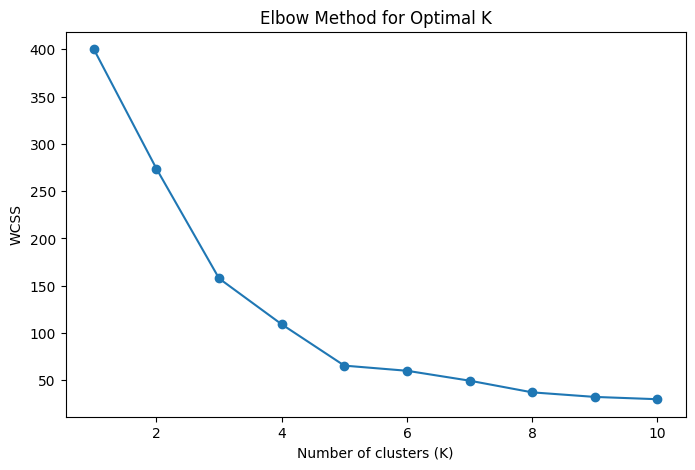

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Find WCSS for different K values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS")
plt.show()


In [5]:
# Apply K-Means with K=5
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataset
df['Cluster'] = y_kmeans

# View first few rows with cluster labels
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


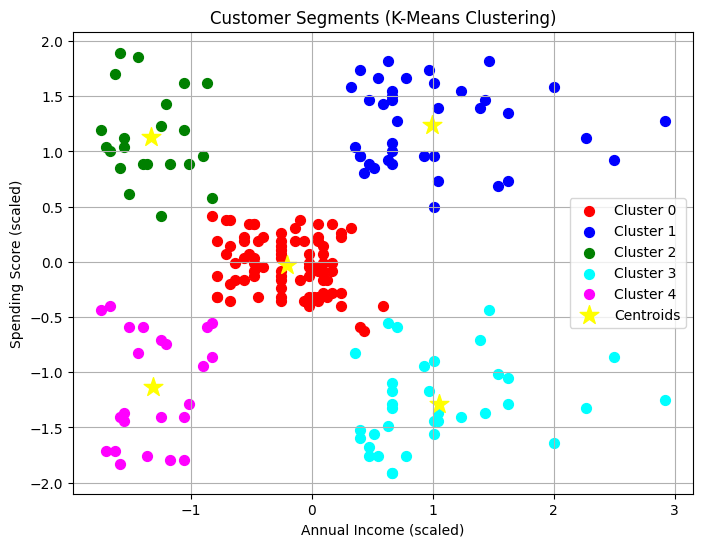

In [9]:
# Plot clusters
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

for i in range(5):
    plt.scatter(
        X_scaled[y_kmeans == i, 0], X_scaled[y_kmeans == i, 1],
        s=50, c=colors[i], label=f"Cluster {i}"
    )

# Plot cluster centers
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=200, c='yellow', label='Centroids', marker='*'
)

plt.title("Customer Segments (K-Means Clustering)")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
score = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score for K=5: {score:.2f}")


Silhouette Score for K=5: 0.55
